### 1. Import Needed Libraries

<pre>
Input    : -
Output   : -
Process  : 
Import some Python libraries that will be used, such as OS, time, requests, IO, selenium, and urlib

    1. PIL Image : Open and save images. 
    2. Os : Document directory management and Path manipulation. 
    3. Time : Setting the operation time of the program. 
    4. Selenium: Automation of website application interaction commands, used to do web scraping. 
    5. WebDriver : Control the web browser. 
    6. Request : Download images from websites.
    7. Urllib.parse : Breaks URLs and parses query strings into dictionary.
</pre>

In [ ]:
import os
import time
import requests
from PIL import Image
from io import BytesIO 
from selenium import webdriver
from urllib.parse import parse_qs, urlparse

### 2. Define Web Headers
<pre>
Input   : -
Output  : -
Process :
Define headers (user's device identity) that will be used for scraping
</pre>

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36'
}

### 3. Run Program

<pre>
Input   : product link
Output  : product images in subfolder
Process :
    1. Create a sub folder to store each product.
    2. Download the image (download_image).
    3. Get the product number from the URL (get_prdt_number).
    4. Take an image from a URL with Selenium (scrape_images).
    5. Define a function to read the URL from the file and call the image capture function (scrape_images_from_file).
    6. Main execution: call the function to read the URL file and retrieve a picture of each URL in the file.
    7. Programs can be paused by interrupting the kernel (stop)
</pre>

Diagram Alur dari Program Image Scraping Olive Young:

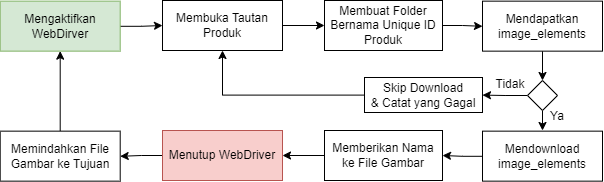

In [ ]:
from PIL import Image
from io import BytesIO 
import os
import time
import requests
from selenium import webdriver
from urllib.parse import parse_qs, urlparse

def download_image(image_url, save_path):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    width, height = image.size
    if width == 1500 and height == 1500:
        with open(save_path, 'wb') as img_file:
            img_file.write(response.content)
        print(f'Downloaded: {save_path}')
    else:
        print(f'Skipped: {image_url} - Image size not 1500x1500 pixels')


def get_prdt_number(url):
    parsed_url = urlparse(url)
    query_params = parse_qs(parsed_url.query)
    prdt_no = query_params.get('prdtNo', [''])[0]
    return prdt_no

def scrape_images(url, save_directory):
     driver = webdriver.Chrome() 
    driver.get(url)
    
    time.sleep(15)

    if "We can't find this product." in driver.page_source:
        prdt_no = get_prdt_number(url)
        prdt_directory = os.path.join(save_directory, f'prdt_{prdt_no}')
        os.makedirs(prdt_directory, exist_ok=True)
        print(f"Product not found. Created directory for prdtNo: {prdt_no}")
        driver.quit()
        return

    image_elements = driver.find_elements("css selector", 'img[src^="https://image.globaloliveyoungshop.com/prdtImg/"], img[src^="https://image.globaloliveyoungshop.com/mig/prdtImg/"]')


    prdt_no = get_prdt_number(url)

    os.makedirs(save_directory, exist_ok=True)
    prdt_directory = os.path.join(save_directory, f'prdt_{prdt_no}')
    os.makedirs(prdt_directory, exist_ok=True)

    downloaded_images = set()

    for idx, img_element in enumerate(image_elements):
        image_url = img_element.get_attribute('src')
        if image_url in downloaded_images:
            print(f'Skipped: {image_url} - Image already downloaded')
            continue

        save_path = os.path.join(prdt_directory, f'image_{idx + 1}.jpg')
        download_image(image_url, save_path)
        print(f'Downloaded: {save_path}')
        downloaded_images.add(image_url)

    # Close the browser
    driver.quit()

def scrape_images_from_file(file_path, save_directory):
    with open(file_path, 'r') as url_file:
        urls = url_file.read().splitlines()

    for url in urls:
        scrape_images(url, save_directory)

if __name__ == "__main__":
    url_file_path = r"D:\Kerja\recommendation_skin_analyst\28-07-2023_ProductScraping\data\OliveYoung\Active_OY.txt"
    save_directory = r"D:\Kerja\recommendation_skin_analyst\28-07-2023_ProductScraping\data\OliveYoung\product-images"

    scrape_images_from_file(url_file_path, save_directory)

### 4, Validation

<pre>
Input   : Product Image Sufolders
Output  : folder_kosong.csv
Process :
Record empty folders due to images failing to download.
</pre>

In [ ]:
import os
import csv

def check_empty_folders(root_folder, csv_file):
    with open(csv_file, 'w', newline='') as csvfile:
        fieldnames = ['Folder_Name']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for subdir, dirs, files in os.walk(root_folder):
            if not files:
                folder_name = os.path.basename(subdir)
                writer.writerow({'Folder_Name': folder_name})

root_folder = r"D:\Kerja\recommendation_skin_analyst\28-07-2023_ProductScraping\data\OliveYoung\product-images"
csv_file = 'folder_kosong.csv'

check_empty_folders(root_folder, csv_file)
